# Wildfire Impact on Education in Mohave County, Arizona

## Importing Packages

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Considered warnings during analysis, suppressed them to clean notebook visually
warnings.filterwarnings("ignore")

## Data Acquisition

### Acquiring Wildfire Data

We read the data in for the fires.

In [2]:
wf_df = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/common_analysis/wf_data.csv')

We filter to only include fires from 1963 on and only those that were within 1250 miles of Kingman, Arizona.

In [3]:
wf_df = wf_df.loc[(wf_df['year']>=1963) & (wf_df['distance']<=1250)]

We define our annual smoke estimate. This is done by first dividing the size of the fire by the distance it was from Kingman, Arizona. This provides a fairly good smoke estimate because a larger fire increases the smoke estimate and a closer fire increases the smoke estimate. We then grouped by year and summed to get an annual smoke estimate. This was then scaled by 184 because that's how many days fire season is and it helps put the measurement on the same order of magnitude as our AQI values.

In [4]:
wf_df['smoke_impact'] = (wf_df['size']/wf_df['distance'])
wf_grp = wf_df.groupby('year', as_index='False')['smoke_impact'].sum().reset_index()
wf_grp['smoke_impact'] = wf_grp['smoke_impact']/184

### Acquiring Education Data

We read the data in for four year graduation rates in Arizona. There is one csv file for each year from 2010-2020.

In [5]:
grad_2010 = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/education_impact/data/2010_grad.csv')
grad_2011 = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/education_impact/data/2011_grad.csv')
grad_2012 = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/education_impact/data/2012_grad.csv')
grad_2013 = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/education_impact/data/2013_grad.csv')
grad_2014 = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/education_impact/data/2014_grad.csv')
grad_2015 = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/education_impact/data/2015_grad.csv')
grad_2016 = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/education_impact/data/2016_grad.csv')
grad_2017 = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/education_impact/data/2017_grad.csv')
grad_2018 = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/education_impact/data/2018_grad.csv')
grad_2019 = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/education_impact/data/2019_grad.csv')
grad_2020 = pd.read_csv('/Users/zach/Jupyter/DATA 512/project/education_impact/data/2020_grad.csv')

We keep only the columns of each dataframe necessary for this project.

In [6]:
grad_2010 = grad_2010[['Cohort Year', 'County', 'Subgroup', 'Number Graduated', 'Number in Cohort']]
grad_2011 = grad_2011[['Cohort Year', 'County', 'Subgroup', 'Number Graduated', 'Number in Cohort']]
grad_2012 = grad_2012[['Cohort Year', 'County', 'Subgroup', 'Number Graduated', 'Number in Cohort']]
grad_2013 = grad_2013[['Cohort Year', 'County', 'Subgroup', 'Number Graduated', 'Number in Cohort']]
grad_2014 = grad_2014[['Cohort Year', 'County', 'Subgroup', 'Number Graduated', 'Number in Cohort']]
grad_2015 = grad_2015[['Cohort Year', 'County', 'Subgroup', 'Number Graduated', 'Number in Cohort']]
grad_2016 = grad_2016[['Cohort Year', 'County', 'Subgroup', 'Number Graduated', 'Number in Cohort']]
grad_2017 = grad_2017[['Cohort Year', 'County', 'Subgroup', 'Number Graduated', 'Number in Cohort']]
grad_2018 = grad_2018[['Cohort Year', 'County', 'Subgroup', 'Number Graduated', 'Number in Cohort']]
grad_2019 = grad_2019[['Cohort Year', 'County', 'Subgroup', 'Number Graduated', 'Number in Cohort']]
grad_2020 = grad_2020[['Cohort Year', 'County', 'Subgroup', 'Number Graduated', 'Number in Cohort']]

We combine the eleven dataframes into one.

In [7]:
grad_df = pd.concat([grad_2010, grad_2011, grad_2012, grad_2013, grad_2014, grad_2015, grad_2016, grad_2017, 
                     grad_2018, grad_2019, grad_2020], ignore_index=True)

We filter to Mohave county, where Kingman, Arizona is located, and to the All demographic subgroup.

In [8]:
grad_df = grad_df[(grad_df['County'] == 'Mohave') & (grad_df['Subgroup'] == 'All')]

We drop County and Subgroup from the data because they are no longer needed.

In [9]:
grad_df = grad_df.drop(['County', 'Subgroup'], axis=1)

We replace * with zeros and convert the Number Graduated and Number in Cohort columns to type integer.

In [10]:
grad_df = grad_df.replace('*', 0)
grad_df['Number Graduated'] = grad_df['Number Graduated'].astype(int)
grad_df['Number in Cohort'] = grad_df['Number in Cohort'].astype(int)

We group by year to get counts of graduated students and total students.

In [11]:
grad_df = grad_df.groupby('Cohort Year').sum().reset_index()

We calculate the graduation rate for each year, drop unnecessary columns, and rename the Cohort Year column.

In [12]:
grad_df['grad_rate'] = grad_df['Number Graduated']/grad_df['Number in Cohort']
grad_df = grad_df.drop(['Number Graduated', 'Number in Cohort'], axis=1)
grad_df = grad_df.rename(columns={'Cohort Year':'year'})

We save the cleaned graduation rate data.

In [269]:
grad_df.to_csv(r'/Users/zach/Jupyter/DATA 512/project/education_impact/data/grad_df.csv', index=False)

## Modeling Graduation Rate using Smoke Impact Estimate

### Merging the Wildfire and Graduation Data

We merge the wildfire data and education data on year for modeling purposes.

In [13]:
model_df = wf_grp.merge(grad_df, on=['year'], how='inner')

Calculate the correlation between smoke impact and graduation rate.

In [16]:
print(model_df['smoke_impact'].corr(model_df['grad_rate']))

0.4322400451535539


### Visualizing the Data Prior to Modeling

We plot a time series of graduation rates for Mohave County, Arizona.

Text(0, 0.5, 'Four Year Graduation Rate')

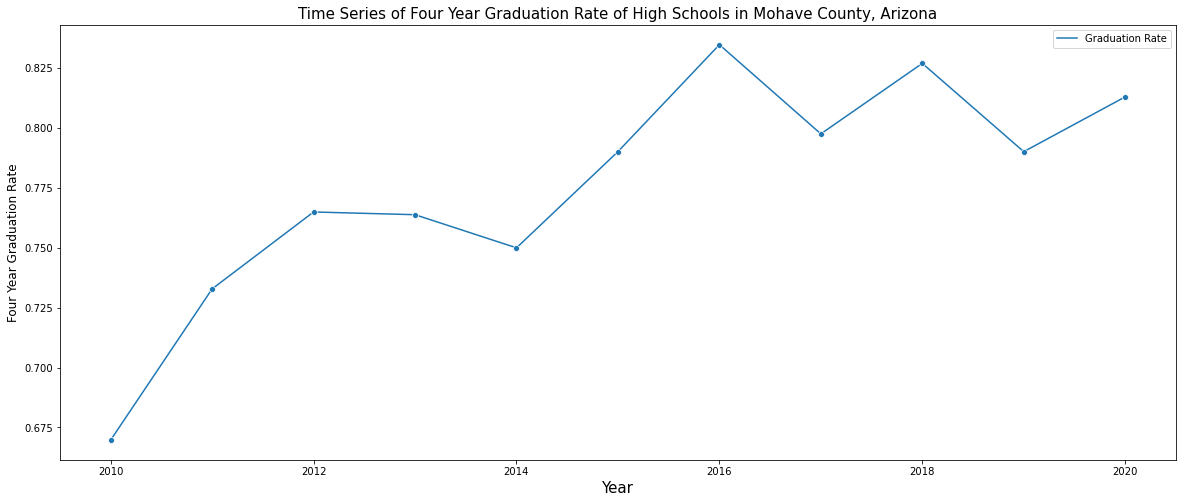

In [19]:
viz4_df = model_df.set_index('year')
viz4_df = viz4_df.drop(['smoke_impact'], axis=1)
viz4_df = viz4_df.rename(columns={'grad_rate': 'Graduation Rate'})
sns.lineplot(data=viz4_df, marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Time Series of Four Year Graduation Rate of High Schools in Mohave County, Arizona', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Four Year Graduation Rate', fontsize=12)

We plot our smoke impact estimate as a time series with graduation rate per 100 students. We did per 100 students so the units would be the same order of magnitude.

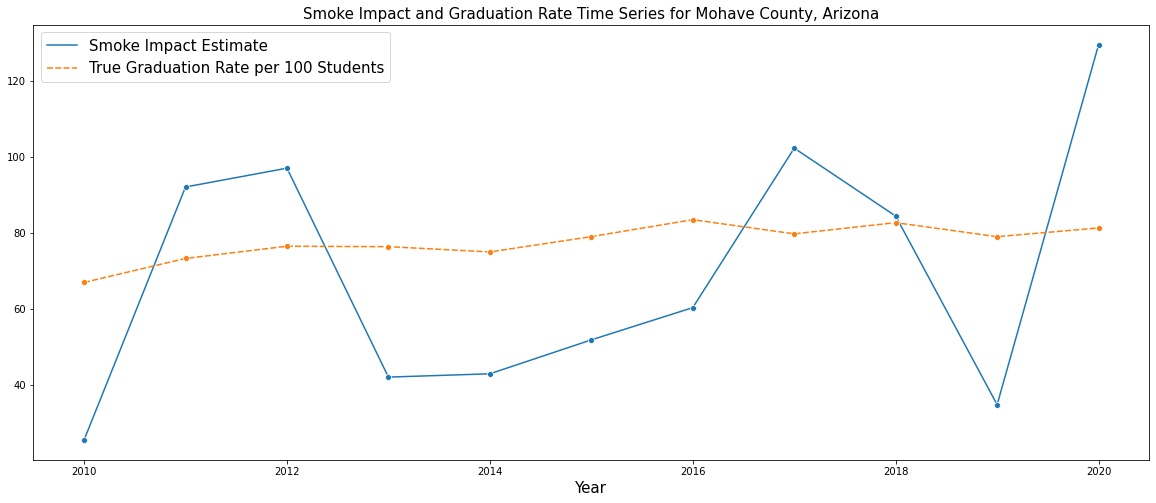

In [20]:
viz3_df = model_df.set_index('year')
viz3_df['grad_rate'] = viz3_df['grad_rate']*100
viz3_df = viz3_df.rename(columns={'smoke_impact': 'Smoke Impact Estimate', 'grad_rate': 
                                  'True Graduation Rate per 100 Students'})
sns.lineplot(data=viz3_df, marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Smoke Impact and Graduation Rate Time Series for Mohave County, Arizona', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend(fontsize=15)

We create a lineplot to show four year graduation rate as a function of our smoke impact estimate for Mohave County, Arizona.

Text(0, 0.5, 'Four Year Graduation Rate')

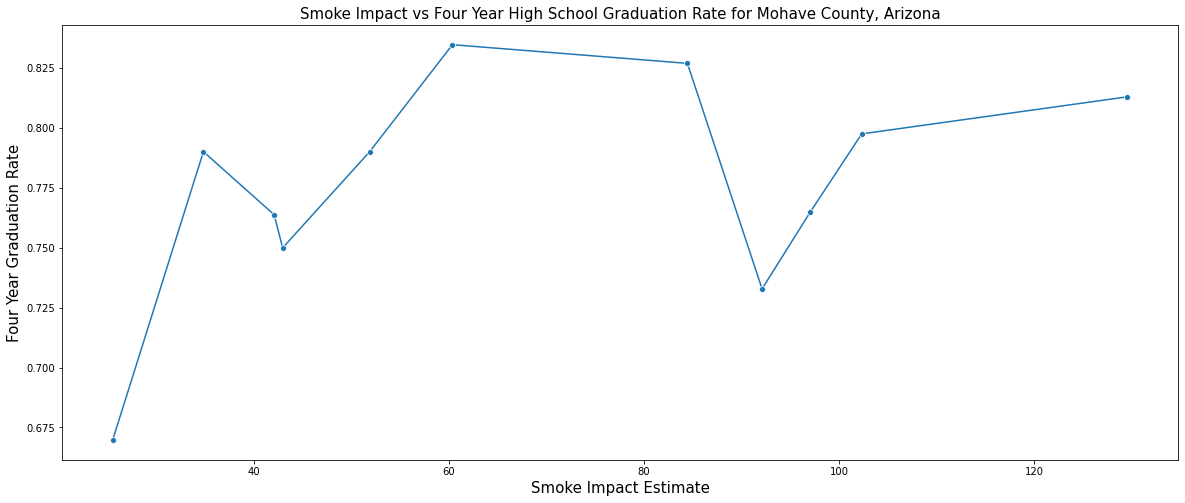

In [21]:
sns.lineplot(data = model_df, x='smoke_impact', y='grad_rate', marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Smoke Impact vs Four Year High School Graduation Rate for Mohave County, Arizona', fontsize=15)
plt.xlabel('Smoke Impact Estimate', fontsize=15)
plt.ylabel('Four Year Graduation Rate', fontsize=15)

### Training the Linear Regression Model

We train the linear regression model, using the smoke impact estimate metric as a predictor for four year graduation rates in Mohave County, Arizona.

In [23]:
x = model_df[['smoke_impact']]
x = sm.add_constant(x)
y = model_df['grad_rate']
lr_model = sm.OLS(y, x).fit()

We print the model summary to understand what we have built.

In [24]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              grad_rate   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2.068
Date:                Sun, 10 Dec 2023   Prob (F-statistic):              0.184
Time:                        14:16:12   Log-Likelihood:                 19.612
No. Observations:                  11   AIC:                            -35.22
Df Residuals:                       9   BIC:                            -34.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7334      0.032     22.571   

### Predicting Four Year Graduation Rates with the Smoke Impact Estimates

We use the linear regression model to predict four year graduation rates.

In [25]:
grad_rate_preds = lr_model.predict(x)

### Visualizing the Model Results

We add our predictions to the dataframe and visualize true graduation rates vs predicted graduation rates.

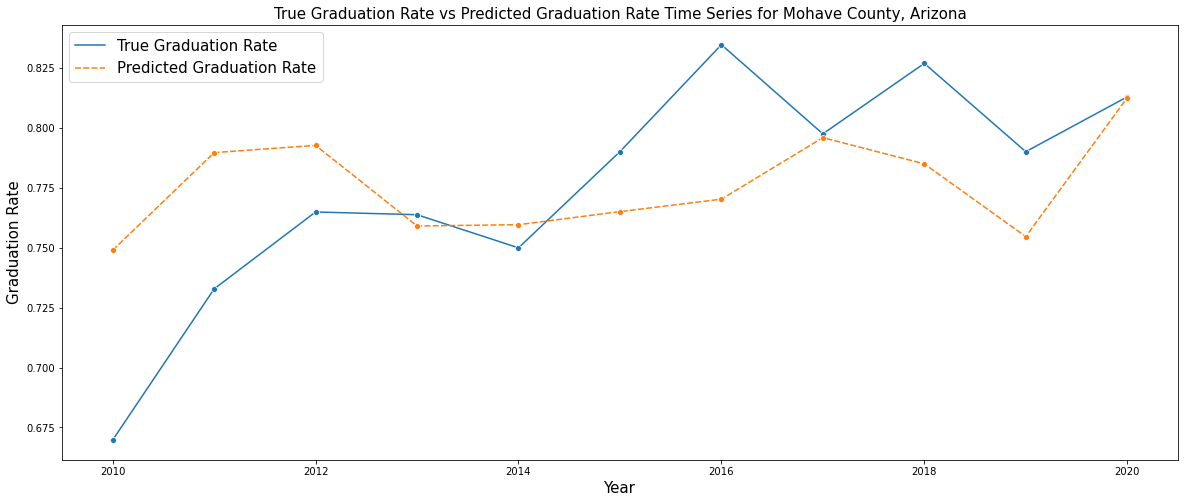

In [26]:
model_df['grad_rate_pred'] = grad_rate_preds
viz_df = model_df.set_index('year')
viz_df = viz_df.drop(['smoke_impact'], axis = 1)
viz_df = viz_df.rename(columns={'grad_rate': 'True Graduation Rate', 'grad_rate_pred': 'Predicted Graduation Rate'})
sns.lineplot(data=viz_df, marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('True Graduation Rate vs Predicted Graduation Rate Time Series for Mohave County, Arizona', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Graduation Rate', fontsize=15)
plt.legend(fontsize=15)

We plot our smoke impact estimate as a time series with the true graduation rates and predicted graduation rates per 100 students. We did per 100 students so the units would be the same order of magnitude.

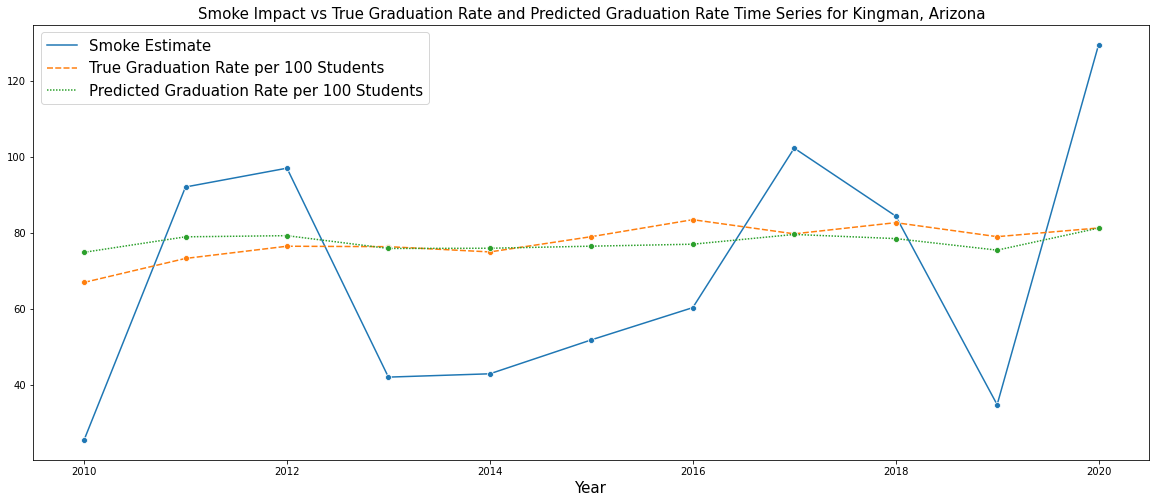

In [27]:
viz2_df = model_df.set_index('year')
viz2_df['grad_rate'] = viz2_df['grad_rate']*100
viz2_df['grad_rate_pred'] = viz2_df['grad_rate_pred']*100
viz2_df = viz2_df.rename(columns={'smoke_impact':'Smoke Estimate', 'grad_rate': 
                                  'True Graduation Rate per 100 Students', 'grad_rate_pred':
                                  'Predicted Graduation Rate per 100 Students'})
sns.lineplot(data=viz2_df, marker='o')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Smoke Impact vs True Graduation Rate and Predicted Graduation Rate Time Series for Kingman, Arizona', 
          fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend(fontsize=15)

We plot our true graduation rate and predicted graduation rate as a function of the smoke impact estimate.

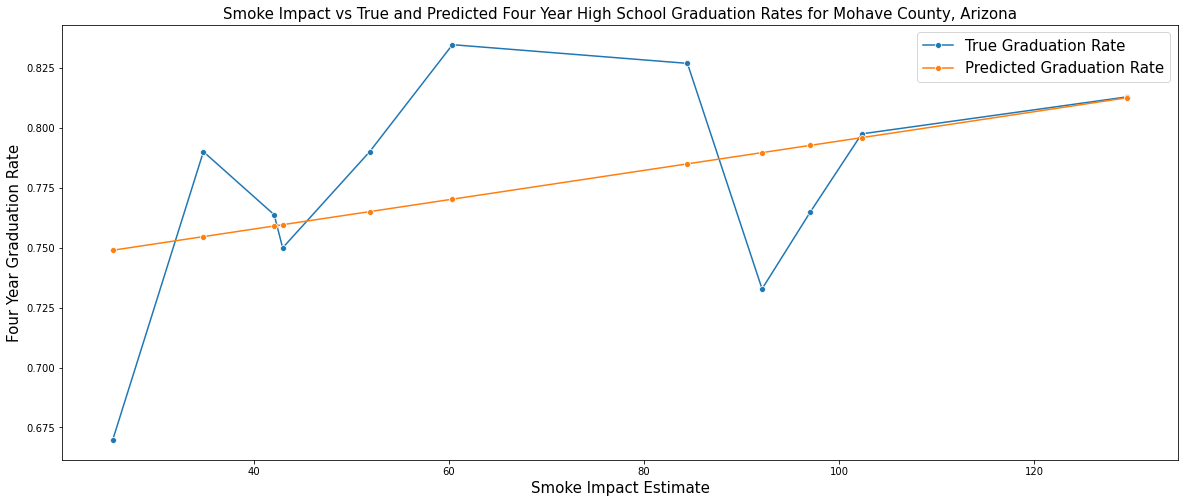

In [28]:
sns.lineplot(data = model_df, x='smoke_impact', y='grad_rate', marker='o', label='True Graduation Rate')
sns.lineplot(data = model_df, x='smoke_impact', y='grad_rate_pred', marker='o', label='Predicted Graduation Rate')
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Smoke Impact vs True and Predicted Four Year High School Graduation Rates for Mohave County, Arizona', 
          fontsize=15)
plt.xlabel('Smoke Impact Estimate', fontsize=15)
plt.ylabel('Four Year Graduation Rate', fontsize=15)
plt.legend(fontsize=15)